In [2]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#
df = pd.read_excel('/content/Encuesta redes  (Respuestas).xlsx')
#
df.head(10)
#
#print(df.dtypes)
#
#print(df.isnull().sum())


,Marca temporal,Edad\n,Sexo,Ocupacion,Redes habituales,Tiempo en redes,Momento del dia,Tipo de contenidos,Uso de redes,Afectan tu vida diaria,Bienestar,Productividad,Impacto en relaciones,Influencia en relaciones,beneficio de redes,Porque es beneficioso,Efectos negativos,Datos personales
0,2025-10-15 16:03:49.133,22,Hombre,Estudiante,"Instagram, TIk tok",4-6 horas,Noche,"La variedad de videos cortos y reels, Los chal...","Pasar el rato o entretenerme, Seguir trends y ...",No,1,3,Sí,Me ayudan a conectar más con otras personas.,No,"Informativo, Inspiración y motivación",NaN,Nada
1,2025-10-15 16:05:10.010,21,Hombre,Estudiante,"Instagram, TIk tok",Más de 6 horas,"Noche, Madrugada","La variedad de videos cortos y reels, Humor y ...","Pasar el rato o entretenerme, Comprar o ver pr...",Tal vez,3,3,Sí,Me ayudan a conectar más con otras personas.,Sí,Entretenimiento,NaN,Poco
2,2025-10-15 16:09:42.230,22,Mujer,Desempleado,"Instagram, TIk tok",1-3 horas,Noche,"La variedad de videos cortos y reels, Humor y ...",Pasar el rato o entretenerme,Tal vez,2,4,Tal vez,Tienen una mezcla de efectos positivos y negat...,Sí,"Informativo, Entretenimiento",NaN,Poco
3,2025-10-15 16:09:42.858,25,Mujer,Profesional/empleado,Instagram,1-3 horas,Noche,Deporte y actividades físicas,"Charlar con amigos y/o familia, Aprender algo ...",Sí,2,4,Sí,No generan ningún cambio en mis relaciones.,Sí,Informativo,NaN,Nada
4,2025-10-15 16:10:11.508,15,Hombre,Estudiante,"Instagram, TIk tok",4-6 horas,"Tarde, Noche","La variedad de videos cortos y reels, Los chal...","Pasar el rato o entretenerme, Charlar con amig...",Sí,2,4,Sí,"Me ayudan a conectar más con otras personas., ...",Tal vez,"Informativo, Inspiración y motivación, Entrete...",Sensacion de perder el tiempo,Nada
5,2025-10-15 16:11:37.135,20,Mujer,Estudiante,"Instagram, Facebook, TIk tok",4-6 horas,"Noche, Madrugada","La variedad de videos cortos y reels, Música y...","Pasar el rato o entretenerme, Charlar con amig...",Sí,3,3,Tal vez,Me ayudan a conectar más con otras personas.,No,NaN,"Ansiedad, Sensacion de perder el tiempo",Mucho
6,2025-10-15 16:12:44.738,22,Mujer,Estudiante,"Instagram, TIk tok",4-6 horas,"Noche, Madrugada","Los challenges y trends, Música y bailes, Infl...","Pasar el rato o entretenerme, Comprar o ver pr...",No,2,5,Sí,"Me ayudan a conectar más con otras personas., ...",Sí,"Inspiración y motivación, Conexión con comunid...",NaN,Poco
7,2025-10-15 16:14:10.145,22,Mujer,Estudiante,"Instagram, Facebook",4-6 horas,Noche,"La variedad de videos cortos y reels, Influenc...","Pasar el rato o entretenerme, Charlar con amig...",No,1,5,Tal vez,Me ayudan a conectar más con otras personas.,Sí,"Inspiración y motivación, Entretenimiento",NaN,No lo pienso
8,2025-10-15 16:15:48.417,22,Mujer,Profesional/empleado,"Instagram, TIk tok",4-6 horas,"Mañana, Tarde","La variedad de videos cortos y reels, Influenc...","Pasar el rato o entretenerme, Charlar con amig...",Tal vez,2,3,No,Tienen una mezcla de efectos positivos y negat...,Sí,"Informativo, Inspiración y motivación, Entrete...",NaN,Poco
9,2025-10-15 16:15:56.686,24,Hombre,Desempleado,"Instagram, Facebook",1-3 horas,Mañana,"La variedad de videos cortos y reels, Deporte ...","Pasar el rato o entretenerme, Comprar o ver pr...",Sí,2,3,No,Me alejan de las interacciones presenciales.,No,NaN,"Adicción, Sensacion de perder el tiempo",No lo pienso


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import os

if not os.path.exists('graficos'):
    os.makedirs('graficos')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

df = pd.read_excel('/content/Encuesta redes  (Respuestas).xlsx')

df.columns = ['Marca temporal', 'Edad', 'Sexo', 'Ocupacion', 'Redes habituales',
              'Tiempo en redes', 'Momento del dia', 'Tipo de contenidos', 'Uso de redes',
              'Afectan tu vida diaria', 'Bienestar', 'Productividad', 'Impacto en relaciones',
              'Influencia en relaciones', 'beneficio de redes', 'Porque es beneficioso',
              'Efectos negativos', 'Datos personales']

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

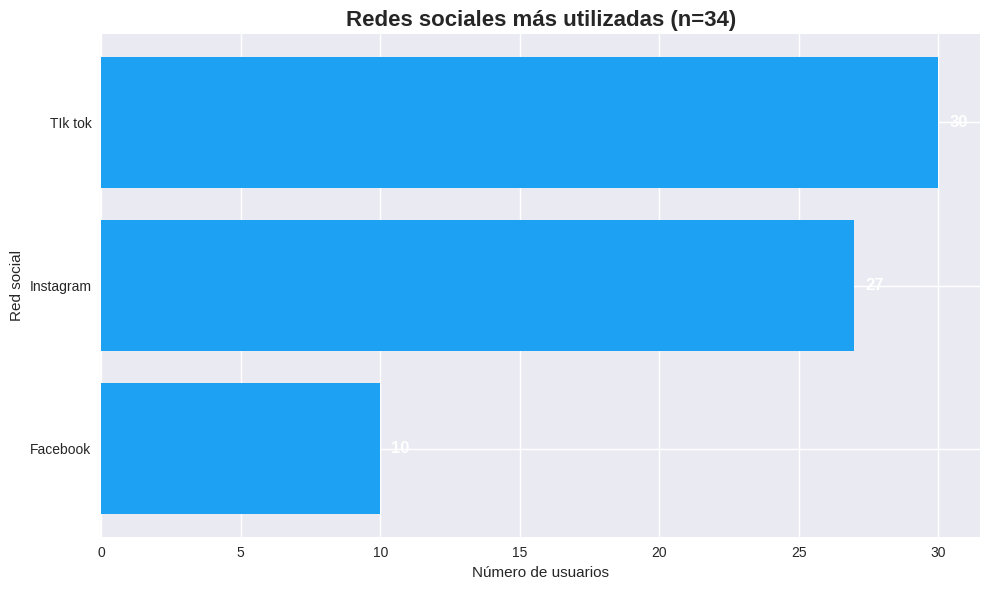

In [5]:
redes = df['Redes habituales'].str.split(', ').explode()
conteo = redes.value_counts()

plt.figure(figsize=(10,6))
bars = plt.barh(conteo.index, conteo.values, color='#1DA1F2')
plt.title('Redes sociales más utilizadas (n=34)', fontsize=16, fontweight='bold')
plt.xlabel('Número de usuarios')
plt.ylabel('Red social')
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.4, bar.get_y() + bar.get_height()/2,
             str(conteo.values[i]), va='center', fontweight='bold', fontsize=12, color='white')
plt.tight_layout()
plt.savefig('graficos/redes_mas_usadas.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

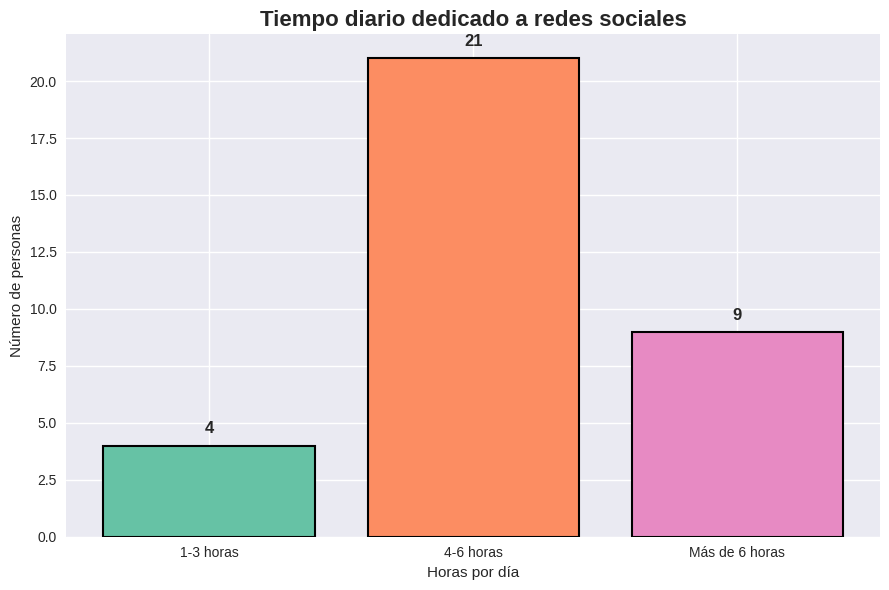

In [6]:
orden = ['1-3 horas', '4-6 horas', 'Más de 6 horas']
df['Tiempo en redes'] = pd.Categorical(df['Tiempo en redes'], categories=orden, ordered=True)
conteo_tiempo = df['Tiempo en redes'].value_counts().sort_index()

plt.figure(figsize=(9,6))
bars = plt.bar(conteo_tiempo.index, conteo_tiempo.values,
               color=['#66c2a5', '#fc8d62', '#e78ac3'], edgecolor='black', linewidth=1.5)
plt.title('Tiempo diario dedicado a redes sociales', fontsize=16, fontweight='bold')
plt.ylabel('Número de personas')
plt.xlabel('Horas por día')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.4,
             f'{int(bar.get_height())}', ha='center', va='bottom', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.savefig('graficos/tiempo_diario.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

/tmp/ipython-input-2263652201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tiempo en redes', y='Bienestar_num', ax=axes[0], palette="Reds")
/tmp/ipython-input-2263652201.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tiempo en redes', y='Productividad_num', ax=axes[1], palette="Blues")


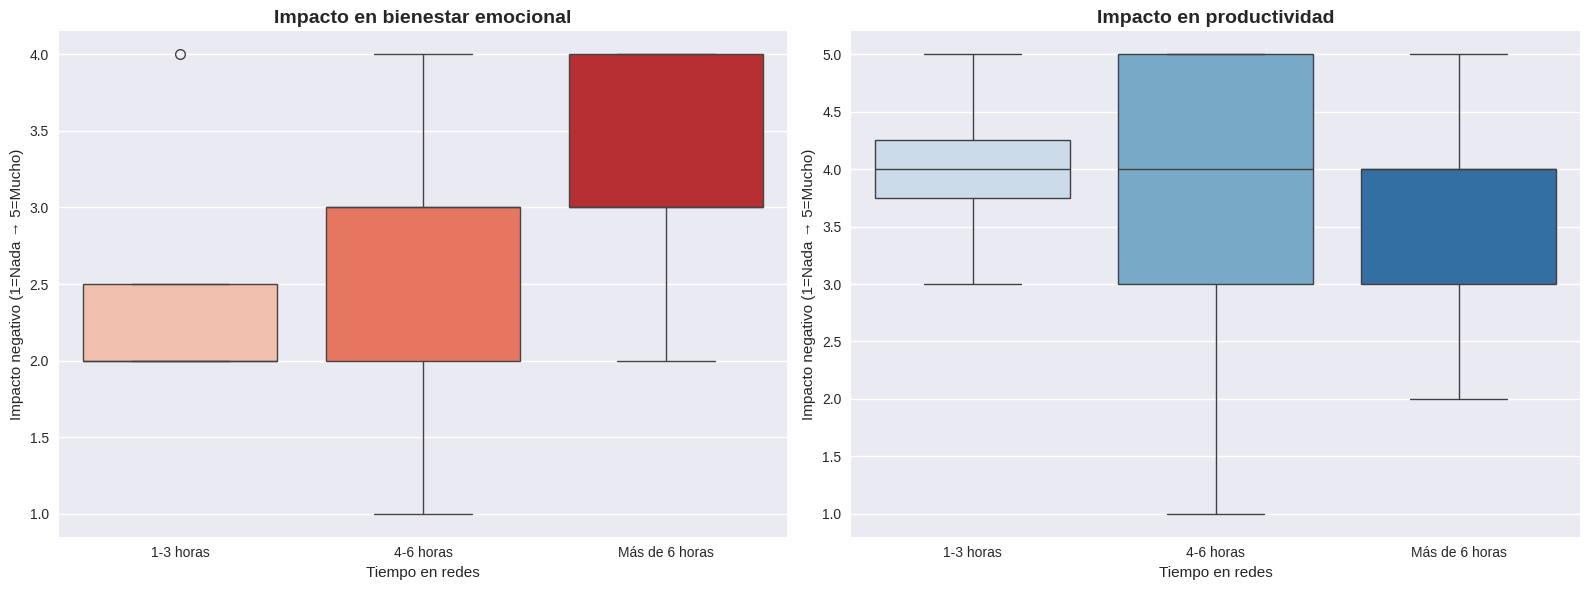

In [7]:
df['Bienestar_num'] = df['Bienestar'].astype(int)
df['Productividad_num'] = df['Productividad'].astype(int)

fig, axes = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(data=df, x='Tiempo en redes', y='Bienestar_num', ax=axes[0], palette="Reds")
axes[0].set_title('Impacto en bienestar emocional', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Impacto negativo (1=Nada → 5=Mucho)')

sns.boxplot(data=df, x='Tiempo en redes', y='Productividad_num', ax=axes[1], palette="Blues")
axes[1].set_title('Impacto en productividad', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Impacto negativo (1=Nada → 5=Mucho)')

plt.tight_layout()
plt.savefig('graficos/bienestar_productividad.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

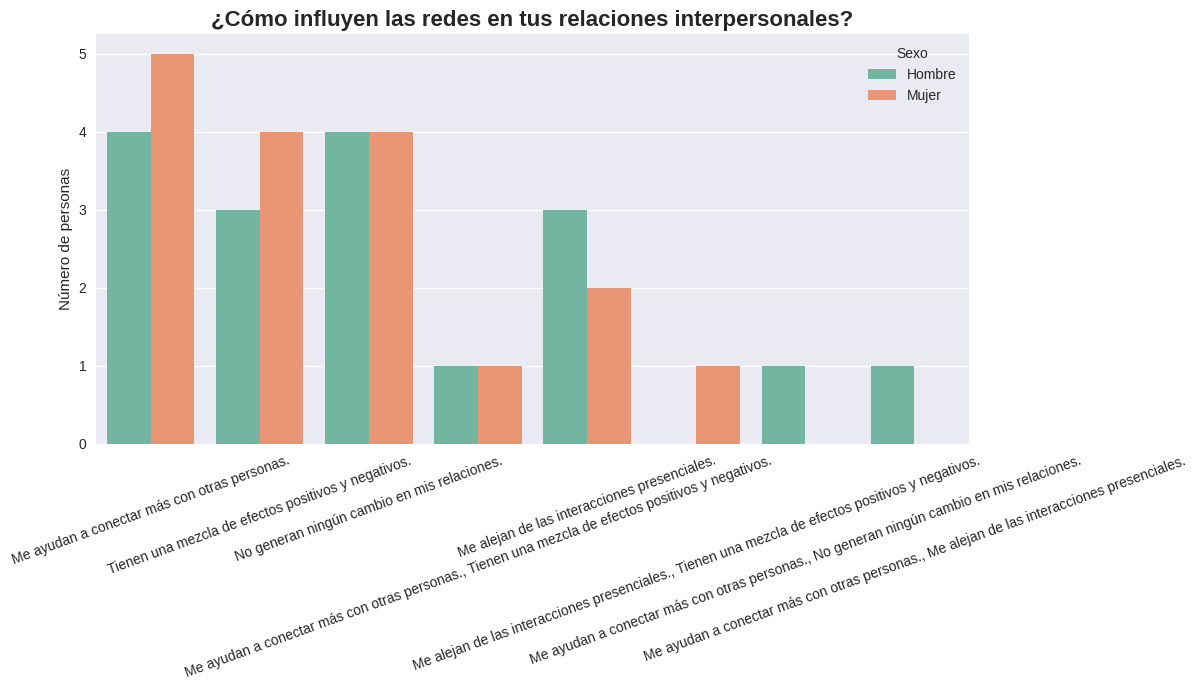

In [8]:
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Influencia en relaciones', hue='Sexo', palette='Set2')
plt.title('¿Cómo influyen las redes en tus relaciones interpersonales?', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Número de personas')
plt.legend(title='Sexo')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig('graficos/influencia_relaciones.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

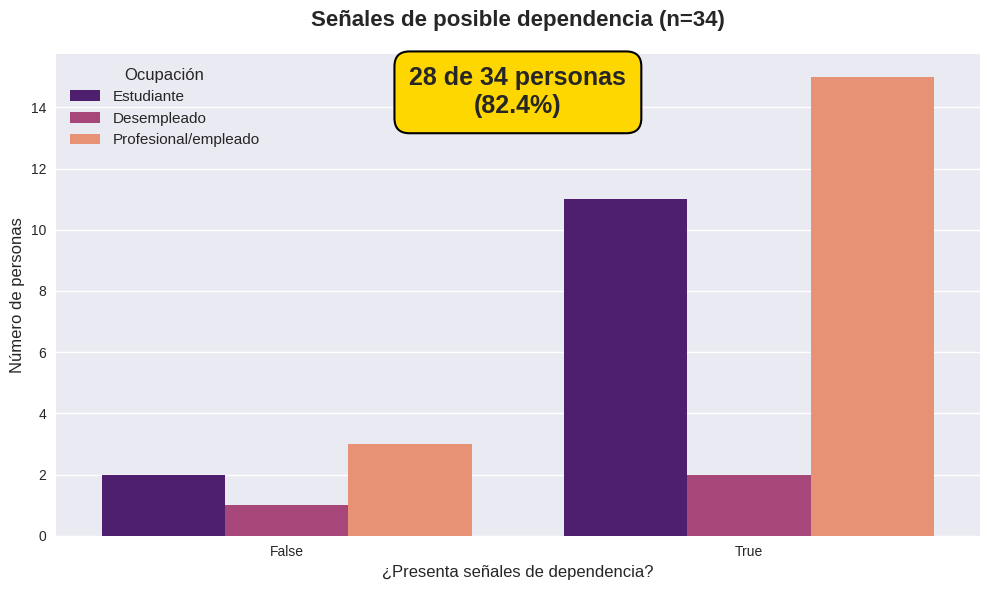

In [14]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='dependencia', hue='Ocupacion', palette='magma')
plt.title('Señales de posible dependencia (n=34)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('¿Presenta señales de dependencia?', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.legend(title='Ocupación', title_fontsize=12, fontsize=11)

max_y = ax.get_ylim()[1]
plt.text(0.5, max_y * 0.92, '28 de 34 personas\n(82.4%)',
         fontsize=18, fontweight='bold', ha='center', va='center',
         bbox=dict(boxstyle="round,pad=0.6", facecolor="#FFD700", edgecolor="black", linewidth=1.5))

plt.tight_layout()
plt.savefig('graficos/dependencia.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

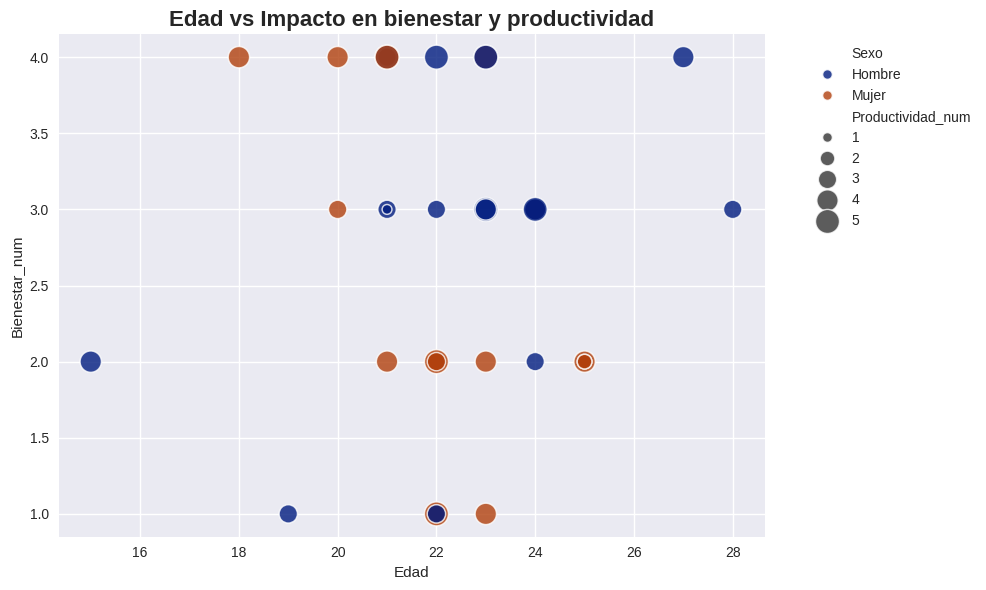

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Edad', y='Bienestar_num', hue='Sexo', size='Productividad_num',
                sizes=(50,300), alpha=0.8, palette='dark')
plt.title('Edad vs Impacto en bienestar y productividad', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('graficos/edad_impacto.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

/tmp/ipython-input-2228574719.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tiempo en redes', y='Bienestar_num', ax=axes[1,0], palette="Reds")


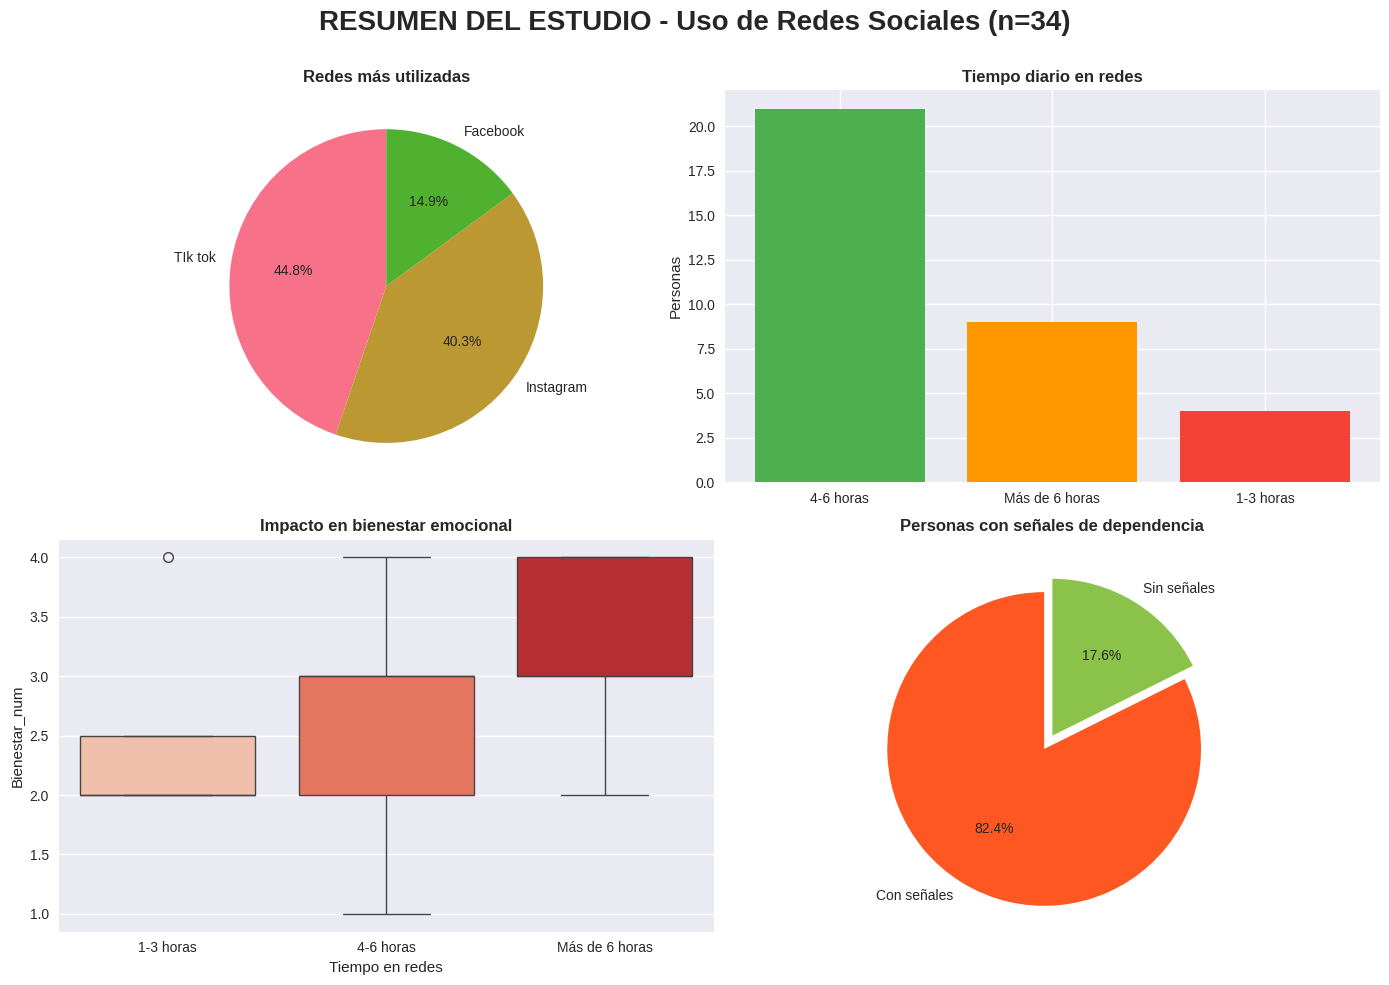

In [11]:
# Grafico final
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('RESUMEN DEL ESTUDIO - Uso de Redes Sociales (n=34)', fontsize=20, fontweight='bold', y=0.98)

# 1. Redes más usadas
redes = df['Redes habituales'].str.split(', ').explode().value_counts().head(5)
axes[0,0].pie(redes.values, labels=redes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('husl'))
axes[0,0].set_title('Redes más utilizadas', fontweight='bold')

# 2. Tiempo diario
tiempo = df['Tiempo en redes'].value_counts()
axes[0,1].bar(tiempo.index, tiempo.values, color=['#4CAF50', '#FF9800', '#F44336'])
axes[0,1].set_title('Tiempo diario en redes', fontweight='bold')
axes[0,1].set_ylabel('Personas')

# 3. Bienestar vs Tiempo
sns.boxplot(data=df, x='Tiempo en redes', y='Bienestar_num', ax=axes[1,0], palette="Reds")
axes[1,0].set_title('Impacto en bienestar emocional', fontweight='bold')

# 4. Dependencia
dep = df['dependencia'].value_counts()
axes[1,1].pie(dep.values, labels=['Con señales','Sin señales'], autopct='%1.1f%%',
              colors=['#FF5722', '#8BC34A'], startangle=90, explode=(0.1,0))
axes[1,1].set_title('Personas con señales de dependencia', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('graficos/resumen_general.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()